In [20]:
!pip install pyautogen

In [21]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')
os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_AI_STUDIO')

# Setting up

In [22]:
llm_config={"model": "gpt-4-turbo"}

# Define a Code Executor

In [23]:
from autogen.coding import LocalCommandLineCodeExecutor

In [24]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
)

# Creating Agents

In [25]:
from autogen import ConversableAgent, AssistantAgent

## Agent with code executor configuration

In [27]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

## Agent with code writing capabilities

In [28]:
code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [29]:
code_writer_agent_system_message = code_writer_agent.system_message

In [30]:
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

# Creating Tasks

#### Using above agents for doing Stock Analysis

In [47]:
import datetime

today = datetime.datetime.now().date()
start_date = f"{today.year}-01-01"

message = (
    f"Today is {today}. "
    "Create a plot showing stock gain YTD for NVDA and TSLA. "
    "Make sure the code is in markdown code block and save the figure "
    "in the /content/coding directory."
)

In [48]:
!pip install yfinance mplfinance matplotlib pandas

In [49]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=message,
)

code_executor_agent (to code_writer_agent):

Today is 2025-02-17. Create a plot showing stock gain YTD for NVDA and TSLA. Make sure the code is in markdown code block and save the figure in the /content/coding directory.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To create a plot showing the YTD (Year-To-Date) stock gain for NVDA and TSLA, we need to complete the following steps:

1. Retrieve the historical stock prices for NVDA (NVIDIA Corporation) and TSLA (Tesla Inc) from the start of the year 2025 to today's date (2025-02-17).
2. Calculate the YTD percentage gain for each.
3. Plot the YTD gains on a graph.
4. Save the graph to the specified directory (/content/coding).

We'll use the `yfinance` library to fetch the stock prices, and `matplotlib` to create and save the plot. Here is the code to perform these tasks:

```python
# filename: plot_stock_gains.py

import yfinance as yf
import matplotlib.py

# Let's see the plots!

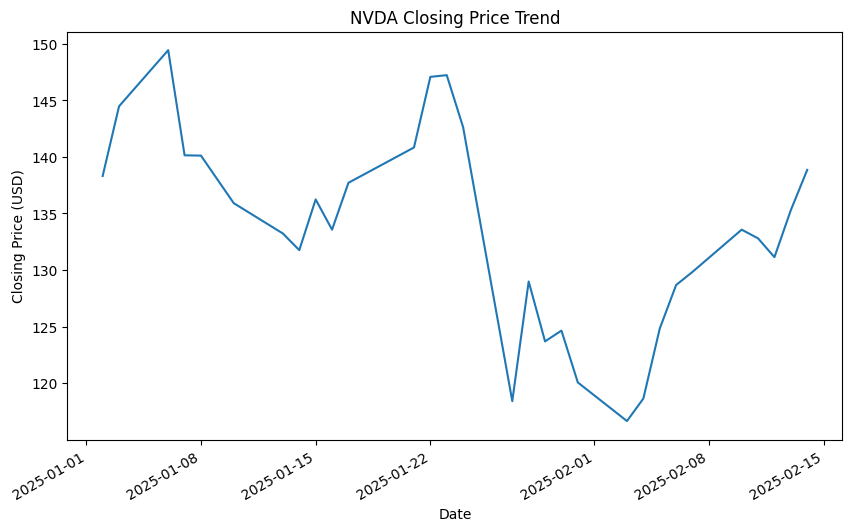

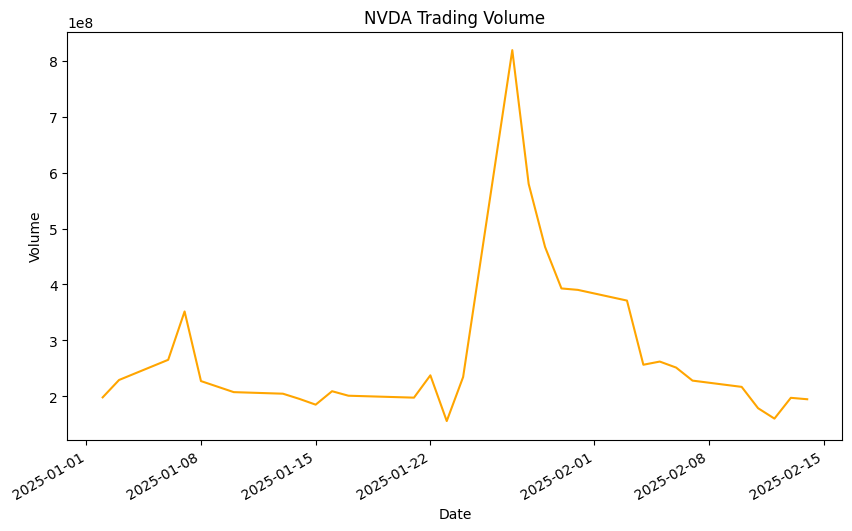

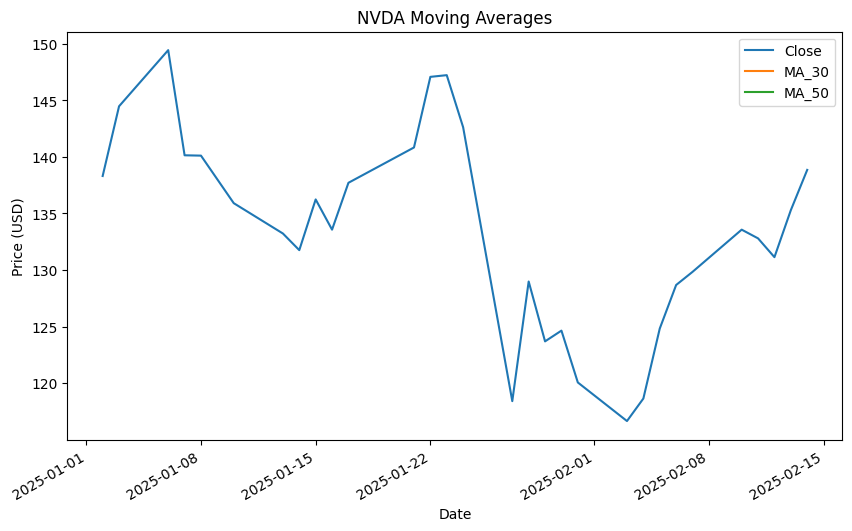

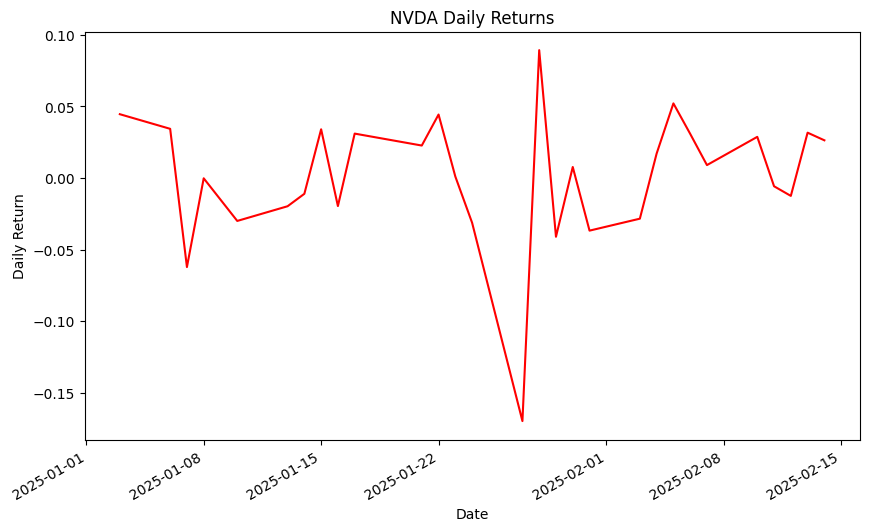

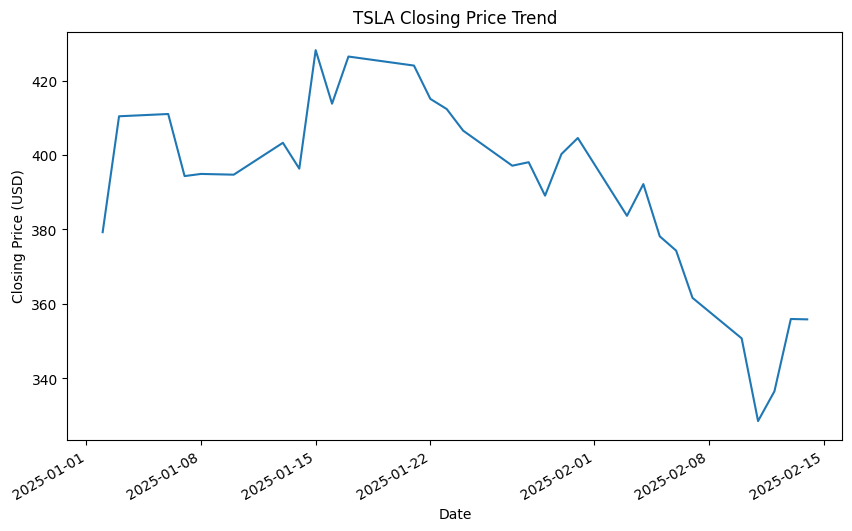

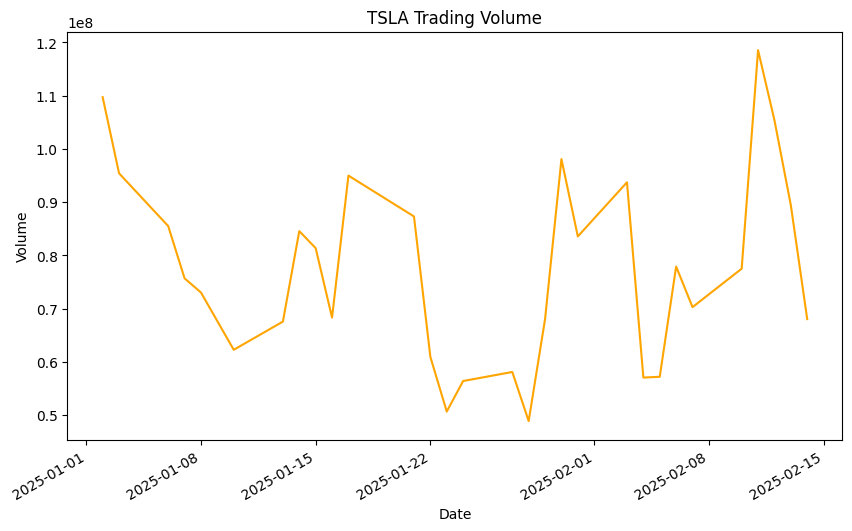

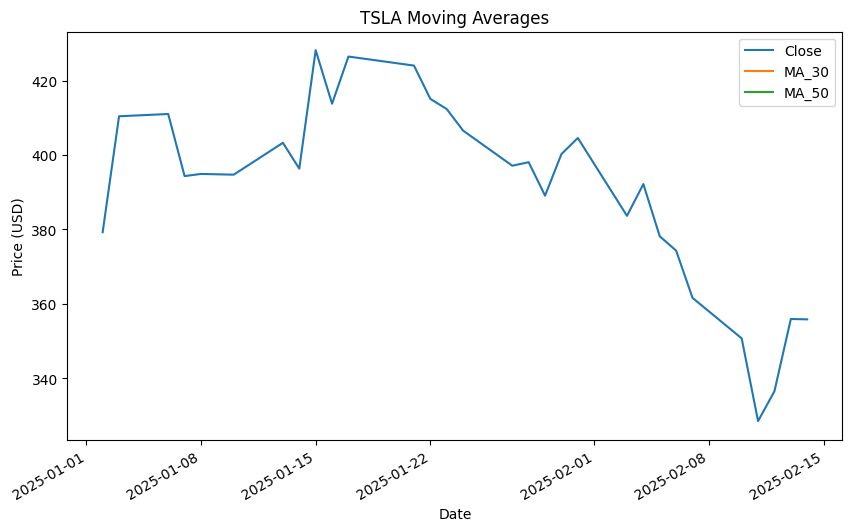

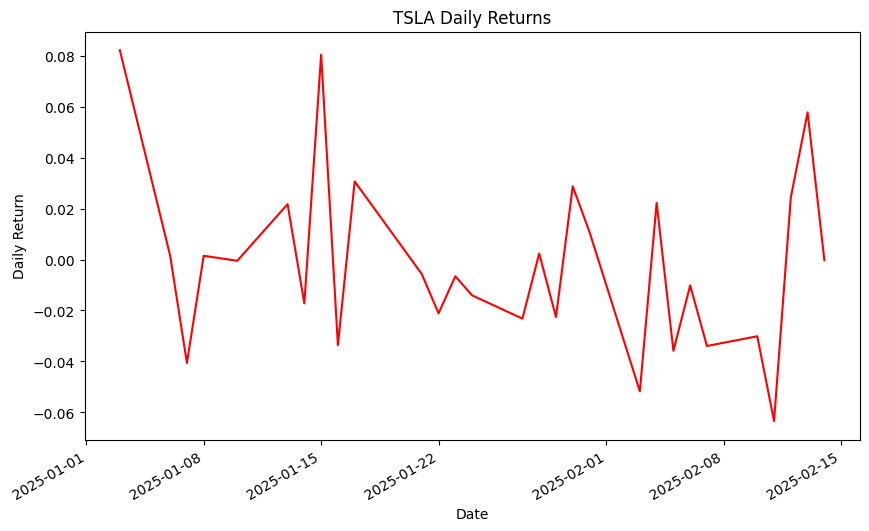

In [50]:
import yfinance as yf
import matplotlib.pyplot as plt

def fetch_stock_data(symbol, start_date, end_date):
    stock = yf.Ticker(symbol)
    hist = stock.history(start=start_date, end=end_date)
    return hist

def plot_close_prices(data, symbol):
    data['Close'].plot(title=f'{symbol} Closing Price Trend', figsize=(10, 6))
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.savefig(f'/content/coding/{symbol}_closing_price_trend.png')
    plt.show()

def plot_volumes(data, symbol):
    data['Volume'].plot(title=f'{symbol} Trading Volume', figsize=(10, 6), color='orange')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.savefig(f'/content/coding/{symbol}_trading_volume.png')
    plt.show()

def plot_moving_averages(data, symbol):
    moving_averages = [30, 50]
    for ma in moving_averages:
        data[f'MA_{ma}'] = data['Close'].rolling(window=ma).mean()
    data[['Close', 'MA_30', 'MA_50']].plot(title=f'{symbol} Moving Averages', figsize=(10, 6))
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.savefig(f'/content/coding/{symbol}_moving_averages.png')
    plt.show()

def plot_daily_returns(data, symbol):
    data['Daily Return'] = data['Close'].pct_change()
    data['Daily Return'].plot(title=f'{symbol} Daily Returns', figsize=(10, 6), color='red')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.savefig(f'/content/coding/{symbol}_daily_returns.png')
    plt.show()

def main():
    start_date = '2025-01-01'
    end_date = '2025-02-17'
    symbols = ['NVDA', 'TSLA']

    for symbol in symbols:
        data = fetch_stock_data(symbol, start_date, end_date)
        plot_close_prices(data, symbol)
        plot_volumes(data, symbol)
        plot_moving_averages(data, symbol)
        plot_daily_returns(data, symbol)

if __name__ == "__main__":
    main()


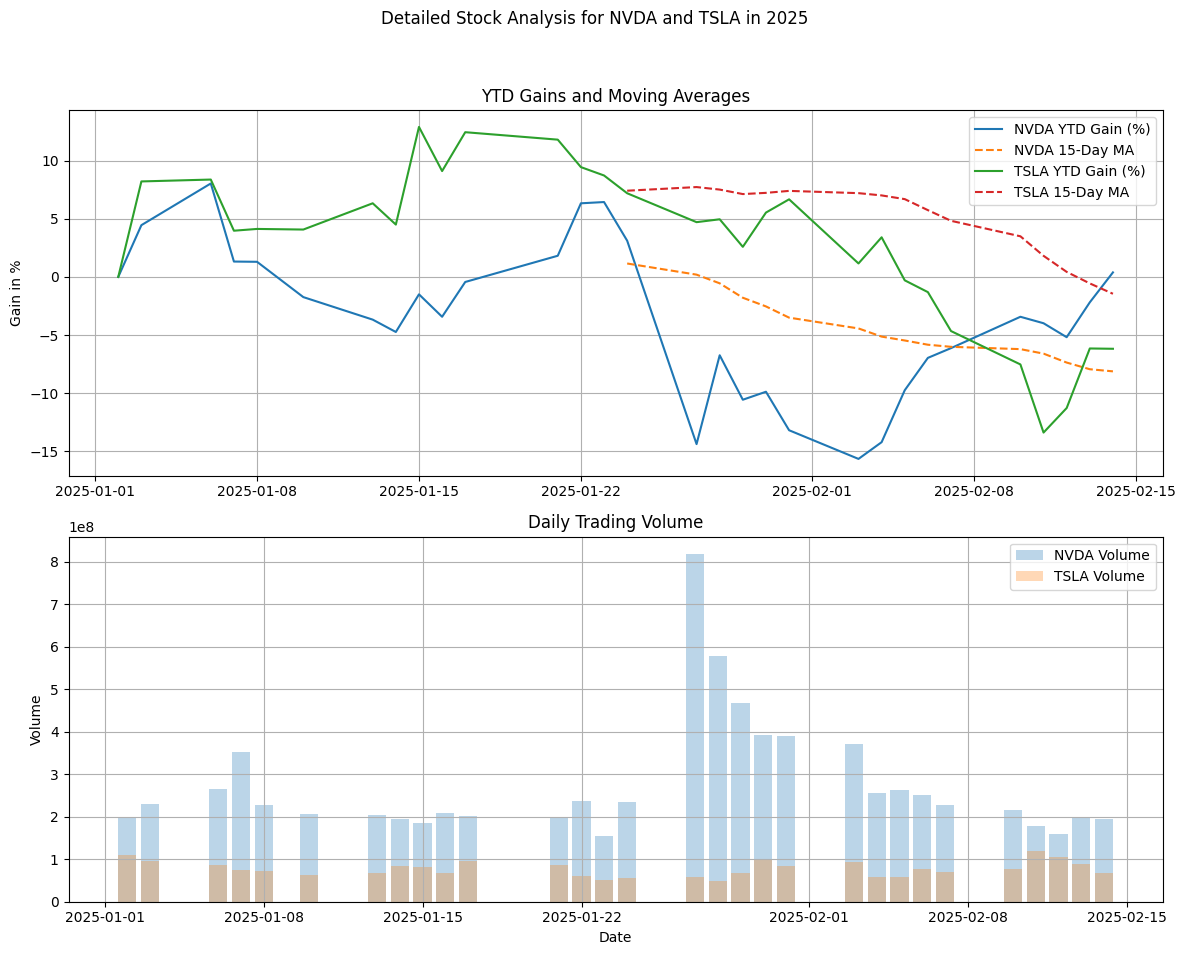

In [45]:
import yfinance as yf
import matplotlib.pyplot as plt
from pandas import DataFrame
from datetime import datetime

def fetch_stock_data(symbol: str, start_date: str, end_date: str) -> DataFrame:
    stock = yf.Ticker(symbol)
    return stock.history(start=start_date, end=end_date)

def calculate_moving_average(data: DataFrame, period: int) -> DataFrame:
    return data['Close'].rolling(window=period).mean()

def plot_stock_data(stock_data: dict, title: str, file_name: str):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Plot YTD gain and moving averages on the first subplot
    for label, data in stock_data.items():
        ytd_gain = ((data['Close'] - data['Close'].iloc[0]) / data['Close'].iloc[0]) * 100
        moving_average = calculate_moving_average(data, period=15)  # 15-day moving average
        ax1.plot(data.index, ytd_gain, label=f'{label} YTD Gain (%)')
        ax1.plot(data.index, ((moving_average - data['Close'].iloc[0]) / data['Close'].iloc[0]) * 100,
                 label=f'{label} 15-Day MA', linestyle='--')

    ax1.set_title('YTD Gains and Moving Averages')
    ax1.set_ylabel('Gain in %')
    ax1.legend()
    ax1.grid(True)

    # Plot volume on the second subplot
    for label, data in stock_data.items():
        ax2.bar(data.index, data['Volume'], label=f'{label} Volume', alpha=0.3)

    ax2.set_title('Daily Trading Volume')
    ax2.set_ylabel('Volume')
    ax2.legend()
    ax2.grid(True)

    # Global settings and saving
    plt.suptitle(title)
    plt.xlabel('Date')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(file_name)
    plt.show()

# Define the start of the year and the current date
start_date = '2025-01-01'
current_date = datetime.now().strftime('%Y-%m-%d')

# Fetch and plot data for NVDA and TSLA
stock_data = {
    'NVDA': fetch_stock_data('NVDA', start_date, current_date),
    'TSLA': fetch_stock_data('TSLA', start_date, current_date)
}

plot_stock_data(stock_data=stock_data,
                title='Detailed Stock Analysis for NVDA and TSLA in 2025',
                file_name='detailed_ytd_stock_analysis.png')

# User Defined Functions

Instead of asking LLM to generate the code for downloading stock data
and plotting charts each time, we can define functions for these two tasks and have LLM call these functions in the code.

In [58]:
def get_stock_prices(stock_symbols, start_date, end_date):
    """Get the stock prices for the given stock symbols between
    the start and end dates.

    Args:
        stock_symbols (str or list): The stock symbols to get the
        prices for.
        start_date (str): The start date in the format
        'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.

    Returns:
        pandas.DataFrame: The stock prices for the given stock
        symbols indexed by date, with one column per stock
        symbol.
    """
    import yfinance

    stock_data = yfinance.download(
        stock_symbols, start=start_date, end=end_date
    )
    return stock_data.get("Close")

In [52]:
def plot_stock_prices(stock_prices, filename):
    """Plot the stock prices for the given stock symbols.

    Args:
        stock_prices (pandas.DataFrame): The stock prices for the
        given stock symbols.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for column in stock_prices.columns:
        plt.plot(
            stock_prices.index, stock_prices[column], label=column
                )
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

# Create the new executor with user defined functions

In [53]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
    functions=[get_stock_prices, plot_stock_prices],
)

In [54]:
code_writer_agent_system_message += executor.format_functions_for_prompt()
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

# Creating Agents

In [55]:
code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_agent_system_message,
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [56]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

# Task

In [57]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}."
    "Download the stock prices YTD for NVDA and TSLA and create"
    "a plot. Make sure the code is in markdown code block and "
    "save the figure to a /content/coding directory",
)

code_executor_agent (to code_writer_agent):

Today is 2025-02-17.Download the stock prices YTD for NVDA and TSLA and createa plot. Make sure the code is in markdown code block and save the figure to a /content/coding directory

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To complete the task, we will go through the following steps:

1. Calculate the starting date of the year (2025-01-01) using today's date provided (2025-02-17).
2. Use the `get_stock_prices` function to get the Year-To-Date (YTD) stock prices for NVIDIA (NVDA) and Tesla (TSLA).
3. Use the `plot_stock_prices` function to create a plot of these stock prices and save the plot.

Here is the Python code to perform these steps. Save the script in a file and run it in your Python environment:

```python
# filename: get_and_plot_stock_prices.py
import os
from functions import get_stock_prices, plot_stock_prices

# Define the stock symbols and the

In [62]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_stock_prices(stock_prices, filename):
    """Plot the stock prices for the given stock symbols.

    Args:
        stock_prices (pandas.DataFrame): The stock prices for the
        given stock symbols.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for column in stock_prices.columns:
        plt.plot(
            stock_prices.index, stock_prices[column], label=column
                )
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

def plot_and_save(stock_prices, directory, filename, title='', ylabel=''):
    plt.figure(figsize=(14, 7))
    if isinstance(stock_prices, pd.DataFrame):
        for col in stock_prices.columns:
            plt.plot(stock_prices.index, stock_prices[col], label=col)
        plt.legend()
    else:
        plt.plot(stock_prices.index, stock_prices, label=filename.strip('.png'))
        plt.legend([filename.strip('.png')])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(os.path.join(directory, filename))
    plt.close()

# Define the stock symbols and the date range
stock_symbols = ['NVDA', 'TSLA']
start_date = '2025-01-01'
end_date = '2025-02-17'

# Get the stock prices
stock_prices = get_stock_prices(stock_symbols, start_date, end_date)

# Create a directory if it does not exist
directory = '/content/coding'
if not os.path.exists(directory):
    os.makedirs(directory)

# Plot comparisions of both stocks
plot_and_save(stock_prices, directory, 'comparison_plot.png', 'Comparison of NVDA and TSLA Stock Prices', 'Price in USD')

# Plot individual stock movements
for stock in stock_symbols:
    plot_and_save(stock_prices[[stock]], directory, f'{stock}_plot.png', f'{stock} Stock Price Movement', 'Price in USD')

# Plot rolling mean for each stock
window_size = 10  # days for moving average
for stock in stock_symbols:
    rolling_mean = stock_prices[[stock]].rolling(window=window_size).mean()
    plot_and_save(rolling_mean, directory, f'{stock}_rolling_mean.png', f'{stock} {window_size}-Day Moving Average', 'Price in USD')
print(f"All enhanced stock price plots saved in {directory}")

[*********************100%***********************]  2 of 2 completed


All enhanced stock price plots saved in /content/coding


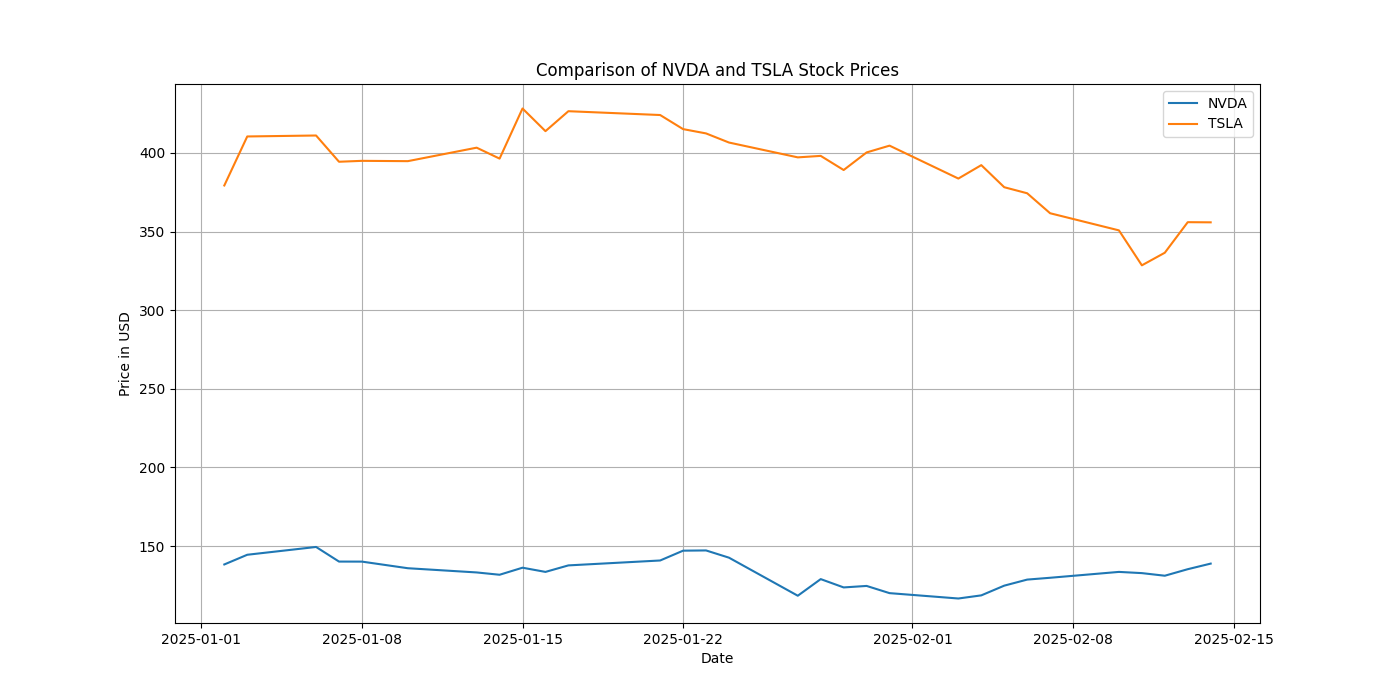

In [64]:
from IPython.display import Image

# Assuming your plot is saved in the /content/coding directory
image_path = '/content/coding/comparison_plot.png'

# Display the image
display(Image(filename=image_path))

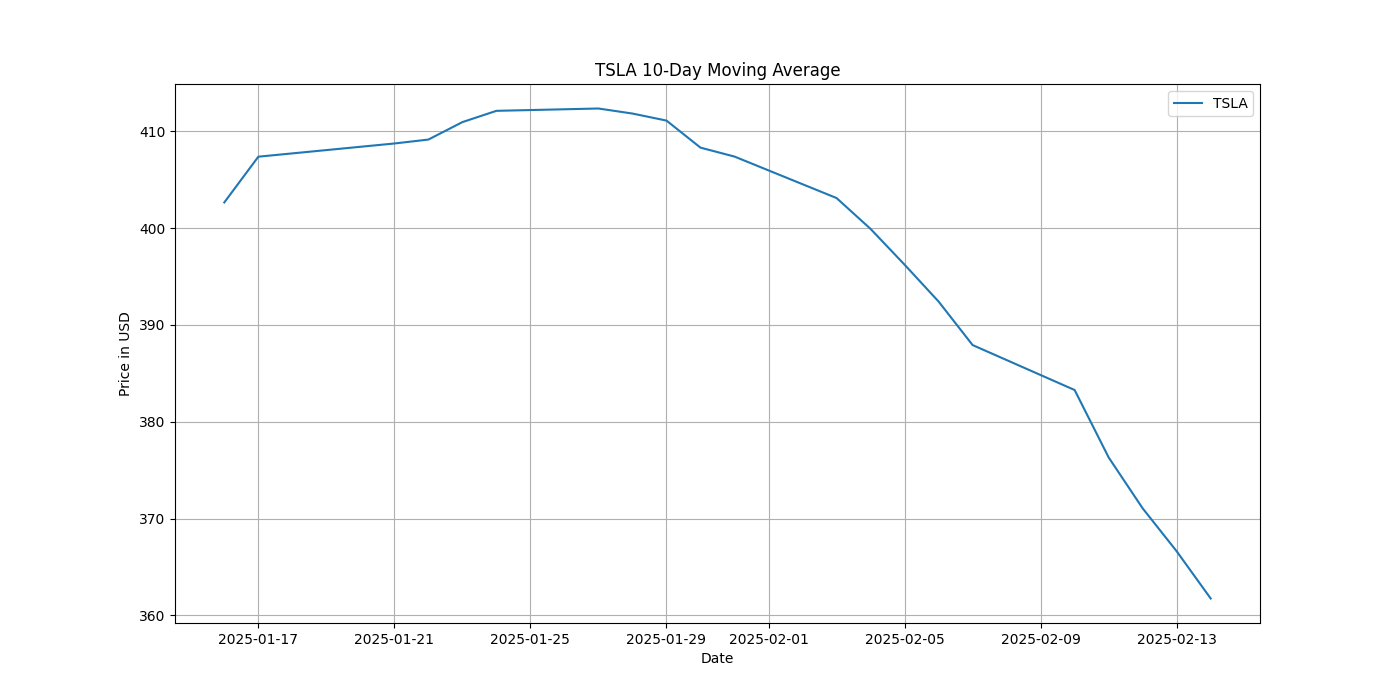

In [65]:
from IPython.display import Image

# Assuming your plot is saved in the /content/coding directory
image_path = '/content/coding/TSLA_rolling_mean.png'

# Display the image
display(Image(filename=image_path))